Objective of LDA is dimensionality reduction! Howover, we want to preserve as much as class discriminatory information as possible.

_Hows that different from PCA_      
PCA as well does dimensionality reduction but didnt care about representing features from one or more class. (discrimination powere wasnt taken into account)


The basic idea is to find a vector w which maximizes the separation between target classes after projecting them onto w.            
Assume you have two features (x1, x2) which has two classes in them. Through LDA, we are trying to find that plane/line that would best separate the classes over x1, x2 together.          
![title](Images/LDA_Explaination1.png)

LDA with two classes

Assume you have 2 classes and two features columns (x1, X2). Each class can be subset as X1, X2; where X1 contains only class 1 and its features.

We can create a big X; stacking X1, X2 and we want to identify the projection of X onto W to get Y, which will best separate out the classes.

$$ Y = W^TX $$
where W is the projection vector used to project X to Y.

### How do you find a good projection? What is the metric which can quantify a good projection?

Case 1. Distance between projected means?
If we create projection so that the means of the classes are wide apart? Can that be the metric?
$$ J(W) = | \mu_{y1} - \mu_{y2} | =| \hat\mu_{1} - \hat\mu_{2} | $$
$$ J(W) = | W^T (\mu_1 - \mu_2) | $$
$\mu_{y1}$ represents the mean of class 1 based on new projection on Y.         
As from below figure maximizing mean can still yeild sub-optimal projections, so we need cost function that include the variance/scatter as well.
![text](Images\LDA_MeanOnlyProjection.png)
Case 2: Scatter - maximize function that represents difference btw means normalized by *within-class* variability.            
Scatter : variance from projected samples and their class mean
$$ s_i^2 = \sum (y - \hat\mu_i)^2 $$
where i represents the class. If we sum for two classes we get multi-class scatter or variability within two class.     
$$ J(W) = \frac{| \hat\mu_1 - \hat\mu_2| ^2} {s_1^2 + s_2^2} $$
Therefore, we will be looking for a projection
where examples from the same class are
projected very close to each other and, at the
same time, the projected means are as farther
apart as possible
![text](Images\LDA_ScatterProjection.png)

## Solve for cost function

We need to find W, so express J interms of W and get derivative.

**Numerator**
$$ (\hat\mu_1 - \hat\mu_2)^2 = (W^T\mu_1 - W^T\mu_2)^2 $$
$$ = W^T (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T W $$
$$ = W^T S_B W = \hat S_B $$
Where $S_B$ is between-class scatter of the original features space. $\hat S_B$ is between-class scatter of the projected space.


**Denominator**
$$ s_i^2 = \sum(y - \hat\mu_i)^2 = \sum [W^TX - W^T \mu_{(X_i)}]^2 $$ 
$$ = \sum W^T(X - \mu_i)(X - \mu_i)^T W $$
$$ = W^T S_i W $$

Where $S_i = \sum(X - \mu_i)(X - \mu_i)^T$. Now we can express the denominator of J(W) as,
$$ W^T S_1 W + W^T S_2 W $$
$$ = W^T S_W W = \hat S_W$$.
Where $ \hat S_W $ is within-class scatter matrix. 

$$ J(w) = \frac{\hat \S_B}{\hat\S_W} = \frac{W^T S_B W}{W^T S_W W}$$
J(w) is a measure of the difference between class
means (encoded in the between-class scatter matrix)
normalized by a measure of the within-class scatter matrix.

$$ \frac{\partial J(w)}{\partial w} = 0 $$
On solving we get,
$$ S_W^{-1} S_B W - J(w)W = 0 $$
$$ S_W^{-1} S_B W = \lambda W $$
$$ S_X = S_W^{-1} S_B $$
where $\lambda, S_X$ are eigen values & vectors.

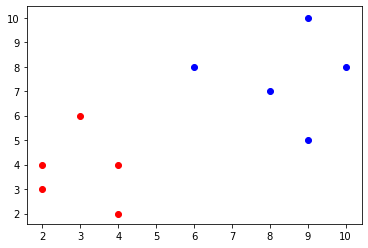

In [28]:
# Generate Data
import numpy as np
import matplotlib.pyplot as plt
X1 = np.array([4,2,2,3,4, 2, 4, 3, 6, 4]).reshape(2, 5) # Class 1 with two features
X2 = np.array([9,6,9,8,10, 10,8,5,7,8]).reshape(2, 5)  # Class 2 with two features
plt.scatter(X1[0], X1[1], color = 'r')
plt.scatter(X2[0], X2[1], color = 'b')

In [29]:
# Generate SW & SB
mu1 = np.mean(X1, axis=1).reshape(-1,1)
mu2 = np.mean(X2, axis=1).reshape(-1,1)
S1 = (X1 - mu1)@(X1 - mu1).T/4
S2 = (X2 - mu2)@(X2 - mu2).T/4
# or a = np.cov(X1 - mu1); b = np.cov(X2 - mu2) 
# Divide by N-1 is from covariance formula
Sw = S1 + S2
Sb = (mu1 - mu2)@(mu1 - mu2).T

In [20]:
w = np.linalg.eig(np.linalg.inv(Sw)@Sb)
evectors = w[1][:,0].reshape(-1,1)
print(f"Eigen Vectors : {evectors}")
evalues = w[0][0]
print(f"Eigen Values : {evalues}")

Eigen Vectors : [[0.90878558]
 [0.41726342]]
Eigen Values : 12.200664451827244


In [21]:
X1_lda = X1.T.dot(evectors)
X2_lda = X2.T.dot(evectors)

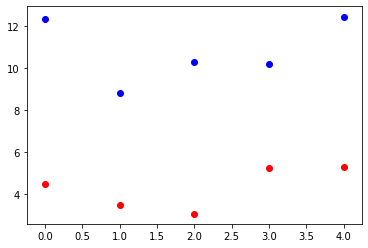

In [27]:
plt.scatter(np.arange(X1.shape[1]), X1_lda, color = 'r')
plt.scatter(np.arange(X1.shape[1]), X2_lda, color = 'b')

The new axis (Yaxis) is clearly separable with respect to two classes.          
In LDA, the number of linear discriminants is atmost c-1 where c is number of classes.